# Descriptive statistics

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)

## Importing the datasets

In [48]:
data_model = pd.read_csv('SEER_clean_datav1210.csv', low_memory=False)

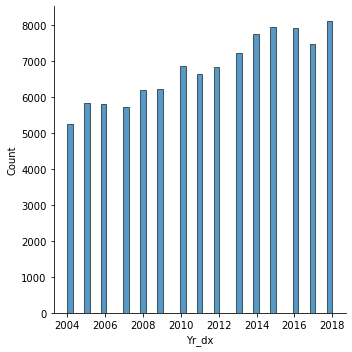

In [51]:
sns.displot(data_model['Yr_dx'])

In [3]:
data = pd.read_csv('SEER_expanded_v1210.csv')

In [5]:
data.shape

(545157, 28)

In [6]:
data.columns.sort_values()

Index(['AGE', 'AYA_site_rec20', 'Age_dx', 'DURATION', 'Death_All_Cause_ext',
       'Death_skin', 'EXPO', 'Extent', 'Laterality', 'Mar_stat', 'Metastasis',
       'Mitotic rate', 'Origin', 'Positive_Node', 'Sex', 'Site_rec_WHO08',
       'Stage', 'Surg_LN', 'Surg_oth', 'Surg_primsite', 'Tot_num_benin',
       'Tot_num_in_situ', 'Tumor', 'Ulceration', 'YEAR', 'Yr_dx', 'reg_nod_ex',
       'reg_nod_pos'],
      dtype='object')

In [7]:
data_M0 = data[data['Metastasis']=='M0']
data_M0 = data_M0.drop(columns=['Metastasis', 'Death_All_Cause_ext'])

In [33]:
data_M0.columns

Index(['DURATION', 'Sex', 'Yr_dx', 'Laterality', 'reg_nod_pos', 'reg_nod_ex',
       'Ulceration', 'Mitotic rate', 'Site_rec_WHO08', 'Origin',
       'AYA_site_rec20', 'Tot_num_in_situ', 'Tot_num_benin', 'Mar_stat',
       'Age_dx', 'Extent', 'Surg_LN', 'Surg_primsite', 'Surg_oth', 'Tumor',
       'Positive_Node', 'Stage', 'EXPO', 'YEAR', 'AGE', 'Death_skin'],
      dtype='object')

In [36]:
X_M0 = pd.get_dummies(data_M0[['DURATION', 'Sex', 'Yr_dx', 'Laterality', 'reg_nod_pos', 'reg_nod_ex',
       'Ulceration', 'Mitotic rate', 'Site_rec_WHO08', 'Origin',
       'AYA_site_rec20', 'Tot_num_in_situ', 'Tot_num_benin', 'Mar_stat',
       'Age_dx', 'Extent', 'Surg_LN', 'Surg_primsite', 'Surg_oth', 'Tumor',
       'Positive_Node', 'Stage', 'EXPO', 'YEAR', 'AGE']], drop_first=False)
X_M0['Death_skin'] = data_M0['Death_skin']

In [37]:
X_M0.columns.sort_values().tolist()

['AGE',
 'AYA_site_rec20_Nodular melanoma',
 'AYA_site_rec20_Other malignant',
 'AYA_site_rec20_Superficial spreading/low cumulative sun damage melanoma',
 'Age_dx',
 'DURATION',
 'Death_skin',
 'EXPO',
 'Extent_Distant',
 'Extent_Localized',
 'Extent_Missing',
 'Extent_Regional',
 'Laterality_Bilateral',
 'Laterality_Left origin',
 'Laterality_Not a paired site',
 'Laterality_One side',
 'Laterality_Paired site',
 'Laterality_Paired site midline tumor',
 'Laterality_Right origin',
 'Mar_stat_Divorced',
 'Mar_stat_Married',
 'Mar_stat_Missing',
 'Mar_stat_Separated',
 'Mar_stat_Single',
 'Mar_stat_Unmarried',
 'Mar_stat_Widowed',
 'Mitotic rate',
 'Origin_American Indian/AK Native',
 'Origin_Asian or Pacific Islander',
 'Origin_Black',
 'Origin_Hispanic',
 'Origin_Missing',
 'Origin_White',
 'Positive_Node_Missing',
 'Positive_Node_N0',
 'Positive_Node_N1',
 'Positive_Node_N2',
 'Positive_Node_N3',
 'Sex_Female',
 'Sex_Male',
 'Site_rec_WHO08_Male Genital Organs',
 'Site_rec_WHO08_Pleu

### Sensitive variables

In [10]:
data_M0['Sex'].value_counts()

Male      288541
Female    249915
Name: Sex, dtype: int64

In [11]:
data_M0['Sex'].value_counts()[0]/data_M0['Sex'].value_counts()[1]

1.1545565492267371

In [1]:
sns.displot(data_M0[data_M0['Sex']=='Male']['AGE'], hist=False, label='Male')
sns.displot(data_M0[data_M0['Sex']=='Female']['AGE'], hist=False, label='Female')
plt.legend()
plt.ylabel('Density')

NameError: name 'sns' is not defined

In [13]:
data_M0['Origin'].value_counts()

White                        509248
Missing                       11561
Hispanic                      11092
Asian or Pacific Islander      3626
Black                          1767
American Indian/AK Native      1162
Name: Origin, dtype: int64

In [14]:
data['Origin'].value_counts()[0]/data['Origin'].value_counts()[1]

44.5105335865999

In [19]:
data.groupby(['Death_skin', 'Mar_stat']).count()

DURATION     Sex   Yr_dx  Laterality  reg_nod_pos  \
Death_skin Mar_stat                                                       
0          Divorced      26234   26234   26234       26234        26234   
           Married      273604  273604  273604      273604       273604   
           Missing      159801  159801  159801      159801       159801   
           Separated      1967    1967    1967        1967         1967   
           Single        65319   65319   65319       65319        65319   
           Unmarried       681     681     681         681          681   
           Widowed       12038   12038   12038       12038        12038   
1          Divorced        582     582     582         582          582   
           Married        3228    3228    3228        3228         3228   
           Missing         393     393     393         393          393   
           Separated        43      43      43          43           43   
           Single          945     945     945         945          945   
           Unmarried        13      13      13          13           13   
           Widowed         309     309     309         309          309   

                      reg_nod_ex  Ulceration  Mitotic rate  Site_rec_WHO08  \
Death_skin Mar_stat                                                          
0          Divorced        26234       26234         26234           26234   
           Married        273604      273604        273604          273604   
           Missing        159801      159801        159801          159801   
           Separated        1967        1967          1967            1967   
           Single          65319       65319         65319           65319   
           Unmarried         681         681           681             681   
           Widowed         12038       12038         12038           12038   
1          Divorced          582         582           582             582   
           Married          3228        3228          3228            3228   
           Missing           393         393           393             393   
           Separated          43          43            43              43   
           Single            945         945           945             945   
           Unmarried          13          13            13              13   
           Widowed           309         309           309             309   

                      Origin  ...  Surg_primsite  Surg_oth  Metastasis  \
Death_skin Mar_stat           ...                                        
0          Divorced    26234  ...          26234     26234       26234   
           Married    273604  ...         273604    273604      273604   
           Missing    159801  ...         159801    159801      159801   
           Separated    1967  ...           1967      1967        1967   
           Single      65319  ...          65319     65319       65319   
           Unmarried     681  ...            681       681         681   
           Widowed     12038  ...          12038     12038       12038   
1          Divorced      582  ...            582       582         582   
           Married      3228  ...           3228      3228        3228   
           Missing       393  ...            393       393         393   
           Separated      43  ...             43        43          43   
           Single        945  ...            945       945         945   
           Unmarried      13  ...             13        13          13   
           Widowed       309  ...            309       309         309   

                       Tumor  Positive_Node   Stage    EXPO    YEAR     AGE  \
Death_skin Mar_stat                                                           
0          Divorced    26234          26234   26234   26234   26234   26234   
           Married    273604         273604  273604  273604  273604  273604   
           Missing    159801         159801  159801  159801  159801  15

<ipython-input-20-d68cb40c1260>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_M0[data_M0['Origin']=='White']['AGE'], hist=False, label='White')
<ipython-input-20-d68cb40c1260>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_M0[data_M0['Origin']=='Missing']['AGE'],

Text(0, 0.5, 'Density')

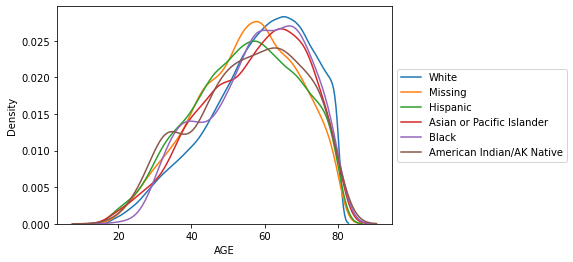

In [20]:
sns.displot(data_M0[data_M0['Origin']=='White']['AGE'], hist=False, label='White')
sns.displot(data_M0[data_M0['Origin']=='Missing']['AGE'], hist=False, label='Missing')
sns.displot(data_M0[data_M0['Origin']=='Hispanic']['AGE'], hist=False, label='Hispanic')
sns.displot(data_M0[data_M0['Origin']=='Asian or Pacific Islander']['AGE'], hist=False, label='Asian or Pacific Islander')
sns.displot(data_M0[data_M0['Origin']=='Black']['AGE'], hist=False, label='Black')
sns.displot(data_M0[data_M0['Origin']=='American Indian/AK Native']['AGE'], hist=False, label='American Indian/AK Native')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Density')

In [21]:
data_M0['Mar_stat'].value_counts()

Married      272746
Missing      159849
Single        65044
Divorced      26160
Widowed       12037
Separated      1946
Unmarried       674
Name: Mar_stat, dtype: int64

In [22]:
data_M0['Mar_stat'].value_counts()[0]/data_M0['Mar_stat'].value_counts()[1]

1.7062727949502343

<ipython-input-23-afb42b400d35>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_M0[data_M0['Mar_stat']=='Divorced']['AGE'], hist=False, label='Divorced')
<ipython-input-23-afb42b400d35>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_M0[data_M0['Mar_stat']=='Widowed

Text(0, 0.5, 'Density')

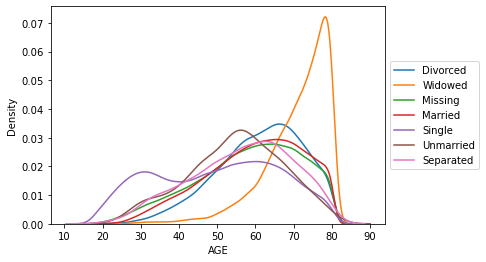

In [23]:
sns.displot(data_M0[data_M0['Mar_stat']=='Divorced']['AGE'], hist=False, label='Divorced')
sns.displot(data_M0[data_M0['Mar_stat']=='Widowed']['AGE'], hist=False, label='Widowed')
sns.displot(data_M0[data_M0['Mar_stat']=='Missing']['AGE'], hist=False, label='Missing')
sns.displot(data_M0[data_M0['Mar_stat']=='Married']['AGE'], hist=False, label='Married')
sns.displot(data_M0[data_M0['Mar_stat']=='Single']['AGE'], hist=False, label='Single')
sns.displot(data_M0[data_M0['Mar_stat']=='Unmarried']['AGE'], hist=False, label='Unmarried')
sns.displot(data_M0[data_M0['Mar_stat']=='Separated']['AGE'], hist=False, label='Separated')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Density')

In [25]:
data_M0.groupby(['Sex', 'Origin']).count()

DURATION   Yr_dx  Laterality  reg_nod_pos  \
Sex    Origin                                                                 
Female American Indian/AK Native       617     617         617          617   
       Asian or Pacific Islander      1857    1857        1857         1857   
       Black                          1054    1054        1054         1054   
       Hispanic                       6689    6689        6689         6689   
       Missing                        5823    5823        5823         5823   
       White                        233875  233875      233875       233875   
Male   American Indian/AK Native       545     545         545          545   
       Asian or Pacific Islander      1769    1769        1769         1769   
       Black                           713     713         713          713   
       Hispanic                       4403    4403        4403         4403   
       Missing                        5738    5738        5738         5738   
       White                        275373  275373      275373       275373   

                                  reg_nod_ex  Ulceration  Mitotic rate  \
Sex    Origin                                                            
Female American Indian/AK Native         617         617           617   
       Asian or Pacific Islander        1857        1857          1857   
       Black                            1054        1054          1054   
       Hispanic                         6689        6689          6689   
       Missing                          5823        5823          5823   
       White                          233875      233875        233875   
Male   American Indian/AK Native         545         545           545   
       Asian or Pacific Islander        1769        1769          1769   
       Black                             713         713           713   
       Hispanic                         4403        4403          4403   
       Missing                          5738        5738          5738   
       White                          275373      275373        275373   

                                  Site_rec_WHO08  AYA_site_rec20  \
Sex    Origin                                                      
Female American Indian/AK Native             617             617   
       Asian or Pacific Islander            1857            1857   
       Black                                1054            1054   
       Hispanic                             6689            6689   
       Missing                              5823            5823   
       White                              233875          233875   
Male   American Indian/AK Native             545             545   
       Asian or Pacific Islander            1769            1769   
       Black                                 713             713   
       Hispanic                             4403            4403   
       Missing                              5738            5738   
       White                              275373          275373   

                                  Tot_num_in_situ  ...  Surg_LN  \
Sex    Origin                                      ...            
Female American Indian/AK Native              617  ...      617   
       Asian or Pacific Islander             1857  ...     1857   
       Black                                 1054  ...     1054   
       Hispanic                              6689  ...     6689   
       Missing                               5823  ...     5823   
       White                               233875  ...   233875   
Male   American Indian/AK Native              545  ...      545   
       Asian or Pacific Islander             1769  ...     1769   
       Black                                  713  ...      713   
       Hispanic                              4403  ...     4403   
       Missing                               5738  ...     5738   
       White                               275373  ...   275373   

### Variable of interest

In [26]:
data_M0['Death_skin'].value_counts()

0    534673
1      3783
Name: Death_skin, dtype: int64

Imbalance ratios

In [27]:
data_M0['Death_skin'].value_counts()[0]/data_M0['Death_skin'].value_counts()[1]

141.33571239756807

## Multivariate analysis

In [38]:
corrmat = X_M0.corr()

In [42]:
np.abs(corrmat['Death_skin']).sort_values()

Positive_Node_Missing                                                      0.000310
Laterality_Paired site midline tumor                                       0.000983
Mar_stat_Unmarried                                                         0.001424
Surg_oth_Missing                                                           0.001780
Tot_num_in_situ                                                            0.001841
Laterality_Paired site                                                     0.001898
Laterality_One side                                                        0.001914
Laterality_Bilateral                                                       0.003111
Yr_dx                                                                      0.003279
Stage_Missing                                                              0.003978
Tot_num_benin                                                              0.004026
AYA_site_rec20_Other malignant                                             0

In [ ]:
corrmat['Sex_Male'].sort_values()

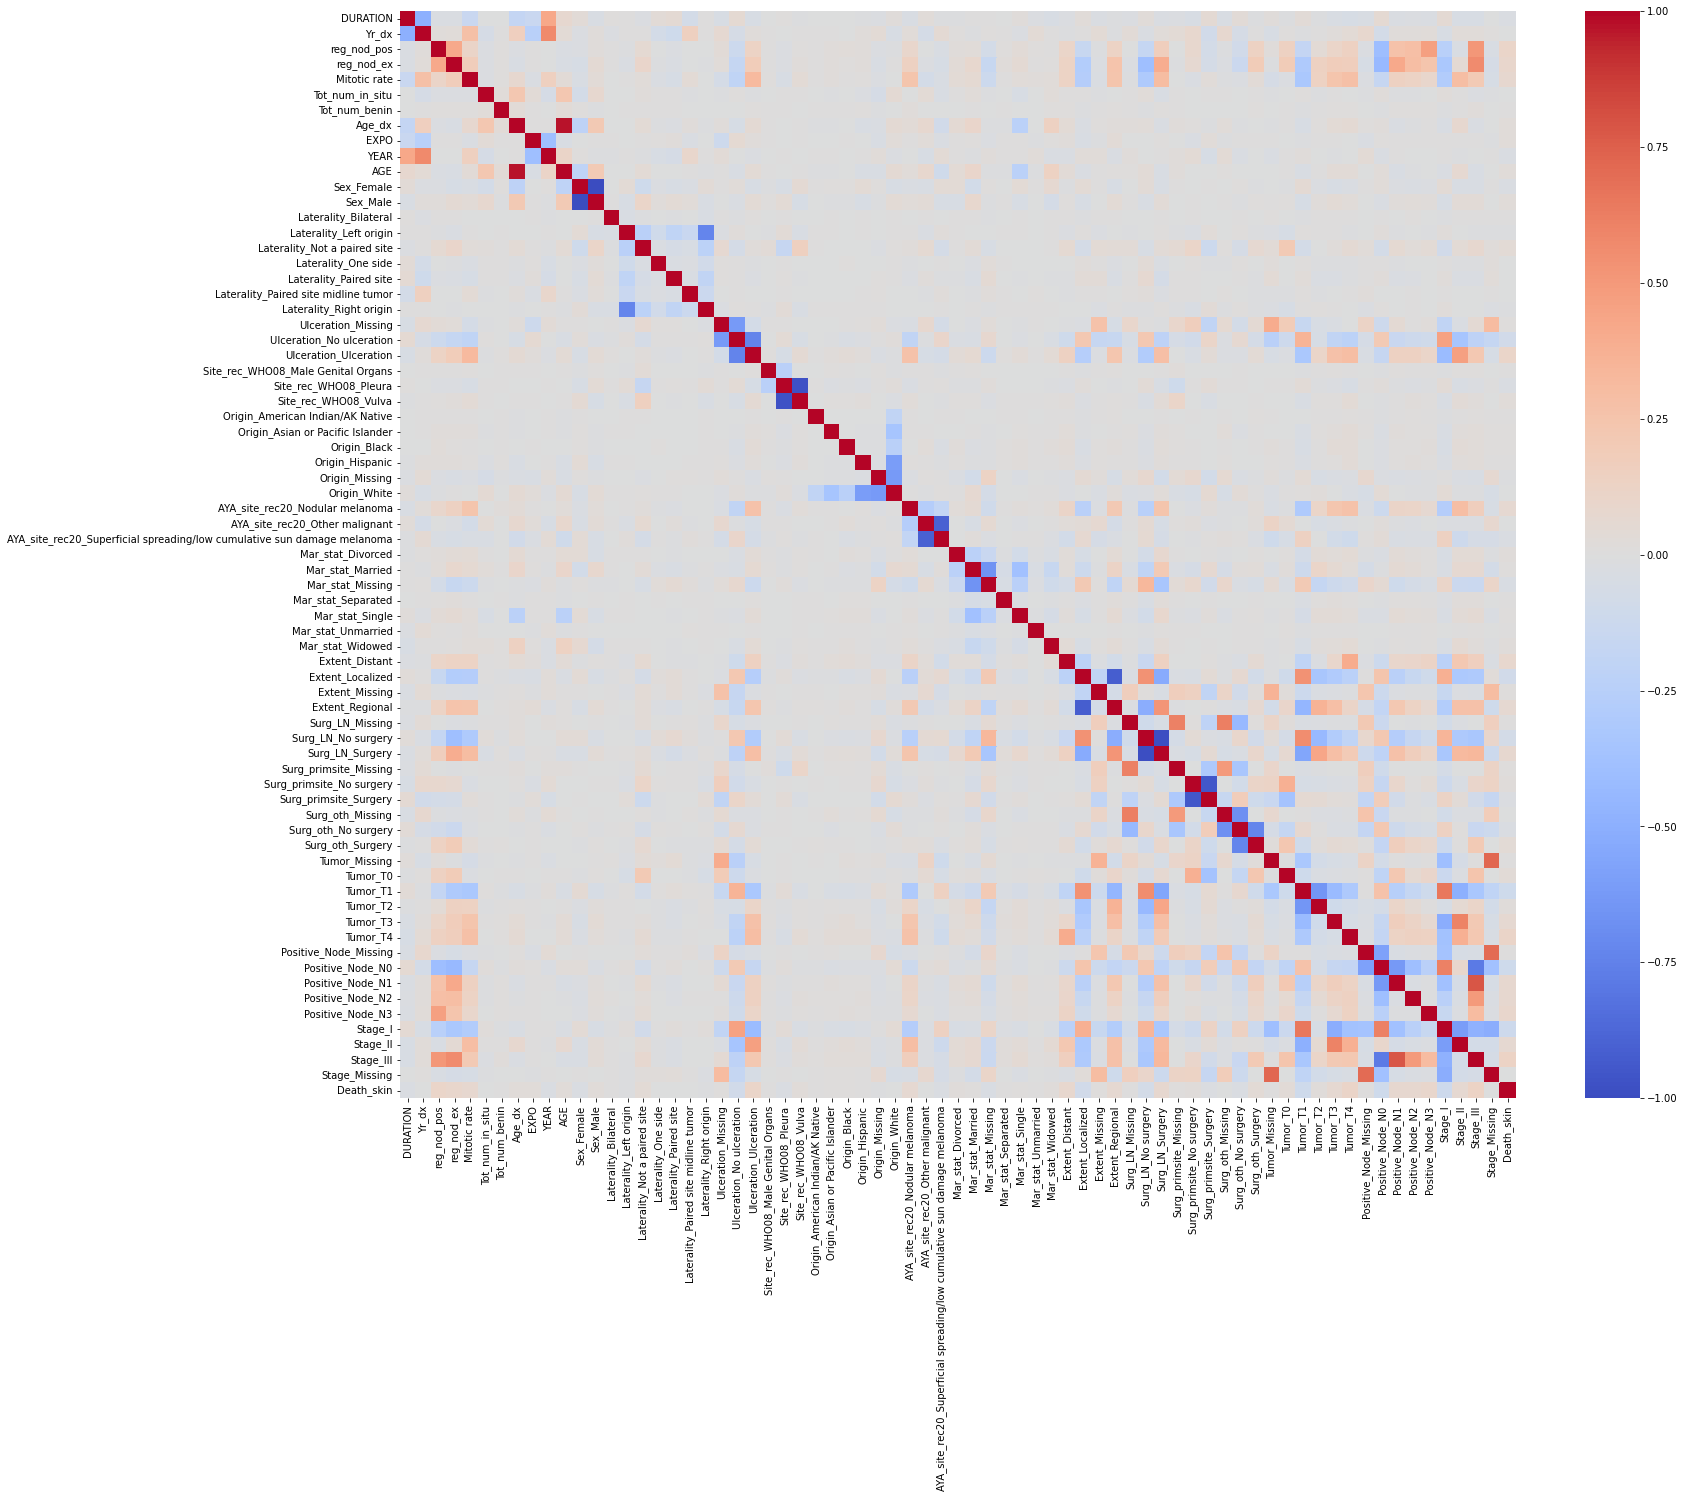

In [40]:
plt.figure(figsize=(25, 20))
sns.heatmap(corrmat, vmin=-1, vmax=1, cmap='coolwarm')
# plt.savefig('heatmap_seer_v1910.jpg')
plt.show()